In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
def grid(file_name):
    #read rows and columns
    with open(file_name, "r") as f:
        content = f.readline()

    lines = [line.split(" ") for line in content.split("\n")]
    lst = []
    
    for line in lines:
        lst += line
    num = (len(lst[0]))
    row = int(lst[0])
    column = int(lst[1])
    return row,column,num
    
def read_image(file_name,num): 
    
    image_file = open(file_name,"r")
    x = []
    for line in image_file:
        for x_i in line.strip():
            x.append(x_i)
    del (x[0:2*num+1])
    return x

In [3]:
def print_image(x,column):
    results = x
    for i in range(len(results)):
        print(results[i], end='')
        if (i+1) % column == 0:
            print(' ')

In [4]:
def countScore(prison_new,x_coordinate,y_coordinate,b):
    #计算单个犯人该次的得分
    #array就是当时的数组，x，y是坐标，b是举报人会得到的分数
    prisoner = prison_new[x_coordinate][y_coordinate]
    score = np.zeros(8,dtype = '<U2')
    #这里数据结构我想不到，赶时间就这么写了
    score[0] = np.char.add(prisoner,prison_new[x_coordinate-1][y_coordinate-1])
    score[1] = np.char.add(prisoner,prison_new[x_coordinate-1][y_coordinate])
    score[2] = np.char.add(prisoner,prison_new[x_coordinate-1][y_coordinate+1])
    score[3] = np.char.add(prisoner,prison_new[x_coordinate][y_coordinate-1])
    score[4] = np.char.add(prisoner,prison_new[x_coordinate][y_coordinate+1])
    score[5] = np.char.add(prisoner,prison_new[x_coordinate+1][y_coordinate-1])
    score[6] = np.char.add(prisoner,prison_new[x_coordinate+1][y_coordinate])
    score[7] = np.char.add(prisoner,prison_new[x_coordinate+1][y_coordinate+1])
    if prisoner == 'C':
        return np.sum(score == 'CC')#只有CC得一分
    if prisoner == 'D':
        return float(b)*float(np.sum(score == 'DC'))#只有DC得b分

In [5]:
def step_update(prison_old,score_board,x_coordinate,y_coordinate):
    #运行一次代表一个犯人的状态更新(根据旧表静态更新，不是动态更新)
    #九宫格按下图编号
    '''
    123
    456
    789
    '''
    a = score_board[x_coordinate-1][y_coordinate-1]
    b = score_board[x_coordinate-1][y_coordinate]
    c = score_board[x_coordinate-1][y_coordinate+1]
    d = score_board[x_coordinate][y_coordinate-1]
    e = score_board[x_coordinate][y_coordinate]
    f = score_board[x_coordinate][y_coordinate+1]
    g = score_board[x_coordinate+1][y_coordinate-1]
    h = score_board[x_coordinate+1][y_coordinate]
    i = score_board[x_coordinate+1][y_coordinate+1]
    lst = [a,b,c,d,e,f,g,h,i]
    
    new_state = []
    #new_state里是得分最多的犯人在九宫格里的序号（可能不止一个）
    for j in range(len(lst)):
        if lst[j]==max(lst):
            new_state.append(j)
    state = []
    table = {0:(-1,-1),1:(-1,0),2:(-1,1),3:(0,-1),4:(0,0),5:(0,1),6:(1,-1),7:(1,0),8:(1,1)}
    #table表示序号0的犯人对应坐标（x-1，y-1），依次类推
    for i in range(len(new_state)):
        state.append(prison_old[x_coordinate+table[new_state[i]][0]][y_coordinate+table[new_state[i]][1]])
    #state里是九宫格里所有获得分数最多的犯人（因为可能并列第一）
    #print(state)
    if 'D' not in state:
        #prison_new[x_coordinate][y_coordinate] = 'C'
        return 'C'
    #elif 'C' not in state:
        #prison_new[x_coordinate][y_coordinate] = 'D'
     #   return 'D'
    else:#我认为这种情况不太可能出现，以防万一定位人向恶
        #prison_new[x_coordinate][y_coordinate] = 'D'#向恶吧
        return 'D'

In [6]:
row,column,num = grid('f99.txt')
x = read_image('f99.txt',num)
x = np.array(x)
x = x.reshape(row,column)
init_prison = np.pad(x,((1,1),(1,1)),'constant')
new_prison = init_prison.copy()
#print(new_prison)

In [7]:
step = 0
while(step<120):
    score_board = np.zeros((row,column),dtype = float)
    for i in range(1,1+row):
        for k in range(1,1+column):
            score_board[i-1][k-1] = countScore(init_prison,i,k,1.65)

    score_board = np.pad(score_board,((1,1),(1,1)),'constant')
    for i in range(1,1+row):
        for k in range(1,1+column):
            new_prison[i][k] = step_update(init_prison,score_board,i,k)
    init_prison = new_prison.copy()#
    step = step+1
#np.set_printoptions(threshold=np.inf)
#print(score_board)
#image = score_board.copy()
#image = image.flatten()
#image = image.tolist()
#print_image(image,column+2)

In [8]:


image = new_prison.copy()
image = image.flatten()
image = image.tolist()
print_image(image,column+2)

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 
0DDDDDDDDDDDDDDDDDCCCCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCCCDDDDDDDDDDDDDDDDD0 
0DDDDDDDDDDDDDDDDDDDDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCDDDDDDDDDDDDDDDDDDDD0 
0DDDDDDDDDDDDCCCDDDDDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCDDDDDCCCDDDDDDDDDDDD0 
0DDDDDDDDDDDCCCCDDDDDDDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCDDDDDDDCCCCDDDDDDDDDDD0 
0DDDDDDDDDDCCCCCCCCDDDDDDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCDDDDDDCCCCCCCCDDDDDDDDDD0 
0DDDDDDDDDDCCCCCCCCDDDDDCCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCDDDDDCCCCCCCCDDDDDDDDDD0 
0DDDDDDDDDDCCCCCCCCDDDDDCCCCCDDCCCCDDDDDDDDCCCCDDDDDDDCCCCDDDDDDDDCCCCDDCCCCCDDDDDCCCCCCCCDDDDDDDDDD0 
0DDDDDDDDDDDCCCCCCCDDDDDDDDCCCDCCCCDDDDDCCCCCCCCCCDCCCCCCCCCCDDDDDCCCCDCCCDDDDDDDDCCCCCCCDDDDDDDDDDD0 
0DDDDDDDDDDDDCCCCCDDDDDDDDDCCCDCCCCDDDDDCCCCCCCCCCDCCCCCCCCCCDDDDDCCCCDCC

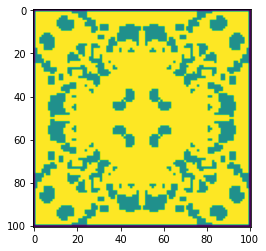

In [9]:
picture = np.zeros((row+2,column+2))
P = new_prison.copy()
picture[P=='0'] = 0
picture[P=='C'] =128
picture[P=='D'] = 255
pyplot.imshow(picture)
pyplot.imsave('prisoner.png',picture)